In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.neural_network import MLPClassifier
from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
f1_score, matthews_corrcoef, mean_squared_error, roc_curve, auc
from sklearn import datasets
from sklearn.model_selection import learning_curve
sb.set() # set the default Seaborn style for graphics

In [2]:
#IMPORT CLEANED DATASET FROM CSV FILE
cardio_clean = pd.read_csv('Dataset\cardio_clean.csv')

In [3]:
cardio_clean.describe() 

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
count,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000
mean,49979.972130,53.358509,164.686974,73.357189,27.055973,126.173336,81.632592,0.088247,0.052395,0.804297,0.492544
std,28887.848429,6.730889,7.533603,12.468874,4.337957,13.716828,7.555582,0.283657,0.222824,0.396744,0.499949
min,0.000000,39.000000,139.000000,36.000000,15.400000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,24908.000000,48.000000,160.000000,65.000000,23.900000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50005.500000,54.000000,165.000000,72.000000,26.300000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74956.250000,58.000000,170.000000,81.000000,29.800000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,193.000000,134.000000,39.600000,168.000000,104.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
cardio_clean.corr()

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
id,1.000000,0.003707,-0.000524,0.001649,0.001567,0.007507,0.005195,-0.001571,-0.000950,0.003512,0.007887
Age,0.003707,1.000000,-0.099285,0.045014,0.107392,0.204634,0.146076,-0.050187,-0.029986,-0.009215,0.236037
Height,-0.000524,-0.099285,1.000000,0.386548,-0.168129,0.005661,0.021995,0.191807,0.097105,-0.012723,-0.017780
Weight,0.001649,0.045014,0.386548,1.000000,0.840210,0.233566,0.214359,0.084017,0.073763,-0.011357,0.157391
BMI,0.001567,0.107392,-0.168129,0.840210,1.000000,0.245227,0.215159,-0.023581,0.020781,-0.005238,0.177943
AP_HI,0.007507,0.204634,0.005661,0.233566,0.245227,1.000000,0.715613,0.026175,0.029719,0.003194,0.432843
AP_LO,0.005195,0.146076,0.021995,0.214359,0.215159,0.715613,1.000000,0.023394,0.032579,-0.000162,0.335679
Smoke,-0.001571,-0.050187,0.191807,0.084017,-0.023581,0.026175,0.023394,1.000000,0.344691,0.023977,-0.018115
Alco,-0.000950,-0.029986,0.097105,0.073763,0.020781,0.029719,0.032579,0.344691,1.000000,0.025887,-0.010291
Active,0.003512,-0.009215,-0.012723,-0.011357,-0.005238,0.003194,-0.000162,0.023977,0.025887,1.000000,-0.036683


In [5]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


## Initalizing the various ML models

In [6]:
# Logistics Regression
# Extract Response and Predictors
y = pd.DataFrame(cardio_clean["Cardio"])
X = pd.DataFrame(cardio_clean[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Linear Regression using Train Data
logreg = LogisticRegression()      
logreg.fit(X_train, y_train.values.ravel())

# Predict Response corresponding to Predictors
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Training set performance
log_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
log_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
log_train_as = accuracy_score(y_train,y_train_pred)
log_test_as = accuracy_score(y_test,y_test_pred)

#Cross Validation
logreg_cv = cross_val_score(logreg,X,y.values.ravel(),cv = 5,scoring = 'accuracy')

In [7]:
# Random Forest
# Change categorical-level to numeric-level
cardio_clean['Chol'] = cardio_clean['Chol'].replace(['N','B','H'],[0,1,2]) 
cardio_clean['Gluc'] = cardio_clean['Gluc'].replace(['N','B','H'],[0,1,2])
cardio_clean['Gender'] = cardio_clean['Gender'].replace(['M','F'],[0,1])

# Separate the predictors to X and Response to y
y = cardio_clean['Cardio']
X = cardio_clean.drop(['Cardio'],axis=1)
X = X.drop(['id'],axis=1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Random Forest using Train Data
rf_Model = RandomForestClassifier(n_estimators=60,max_depth=15,bootstrap=True) 
rf_Model.fit(X_train,y_train)

# Predict Response corresponding to Predictors
y_train_pred = rf_Model.predict(X_train)
y_test_pred = rf_Model.predict(X_test)

# Training set performance
rf_Model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_Model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_Model_train_as = accuracy_score(y_train,y_train_pred)
rf_Model_test_as = accuracy_score(y_test,y_test_pred)

#Cross Validation
rf_Model_cv = cross_val_score(rf_Model,X,y,cv = 5,scoring = 'accuracy')

In [8]:
# K-Nearest Neighbors
# Change categorical-level to numeric-level
cardio_clean['Chol'] = cardio_clean['Chol'].replace(['N','B','H'],[0,1,2]) 
cardio_clean['Gluc'] = cardio_clean['Gluc'].replace(['N','B','H'],[0,1,2])
cardio_clean['Gender'] = cardio_clean['Gender'].replace(['M','F'],[0,1])

# Separate the predictors to X and Response to y
y =cardio_clean['Cardio']
X =cardio_clean.drop(['Cardio'],axis=1)
X =X.drop(['id'],axis=1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# KNN using Train Data
knn = KNeighborsClassifier(n_neighbors = 40, weights = 'uniform', algorithm = 'ball_tree', p = 1, n_jobs = -1)
knn.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_train_as = accuracy_score(y_train,y_train_pred)
knn_test_as = accuracy_score(y_test,y_test_pred)

#Cross Validation
knn_cv = cross_val_score(knn,X,y,cv = 5,scoring = 'accuracy')

In [9]:
# MultiLayer Perceptron
# Change categorical-level to numeric-level
cardio_clean['Chol']=cardio_clean['Chol'].replace(['N','B','H'],[0,1,2]) 
cardio_clean['Gluc']=cardio_clean['Gluc'].replace(['N','B','H'],[0,1,2])
cardio_clean['Gender']=cardio_clean['Gender'].replace(['M','F'],[0,1])

# Separate the predictors to X and Response to y
y = cardio_clean['Cardio']
X = cardio_clean.drop(['Cardio'],axis=1)
X = X.drop(['id'],axis=1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# MLP using Train Data
MLP = MLPClassifier(hidden_layer_sizes = (70, 70, 70, 70),max_iter=84115, learning_rate = 'invscaling', batch_size = 35,activation='relu',solver='adam',learning_rate_init=0.00004,alpha=0.00000005)
MLP.fit(X_train,y_train.values.ravel())

# Predict Response corresponding to Predictors
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

# Training set performance
MLP_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
MLP_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
MLP_train_as = accuracy_score(y_train,y_train_pred)
MLP_test_as = accuracy_score(y_test,y_test_pred)

#Cross Validation
MLP_cv = cross_val_score(MLP,X,y,cv = 5,scoring = 'accuracy')

Model performance for Training set
train Classification report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77     22397
           1       0.77      0.74      0.76     21763

    accuracy                           0.77     44160
   macro avg       0.77      0.77      0.77     44160
weighted avg       0.77      0.77      0.77     44160

- MCC: 0.5309408710392131
- Accuracy: 0.7654438405797102
----------------------------------
Model performance for Test set
test Classification report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74      7482
           1       0.73      0.71      0.72      7238

    accuracy                           0.73     14720
   macro avg       0.73      0.73      0.73     14720
weighted avg       0.73      0.73      0.73     14720

- MCC: 0.45346992768740285
- Accuracy: 0.7268342391304348



<AxesSubplot:>

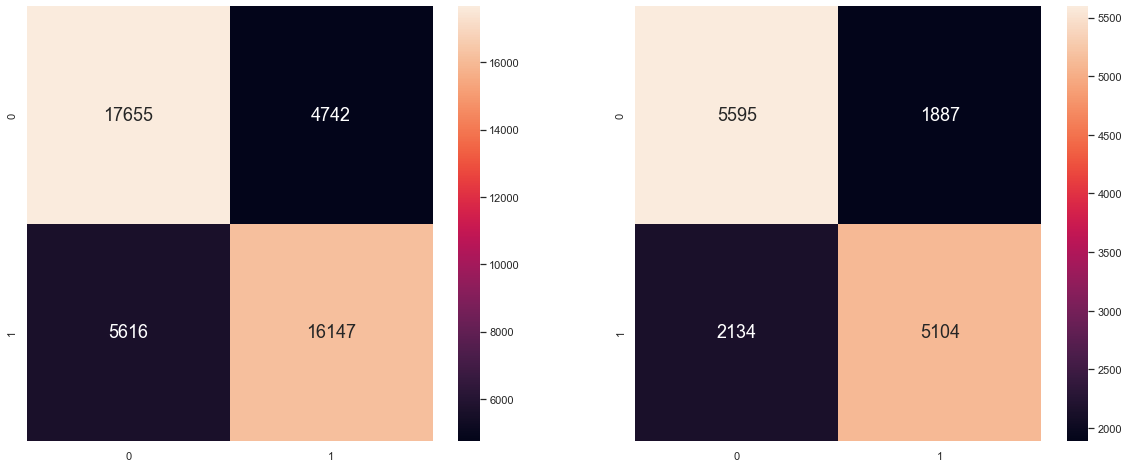

In [10]:
estimator_list = [
    ('RF', rf_Model),
    ('KNN', knn),
    ('MLP', MLP)]

# Build stack model
stack_model = StackingClassifier(estimators = estimator_list, final_estimator=LogisticRegression(), n_jobs = -1)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

#Cross Validation
#stack_model_cv = cross_val_score(stack_model,X,y,cv = 5,scoring = 'accuracy')
#print("The accuracy score of is:",score.mean())

print('Model performance for Training set')
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print('- MCC: %s' % stack_model_train_mcc)
print('- Accuracy: %s' % stack_model_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('test Classification report:\n',classification_report(y_test,y_test_pred))
print('- MCC: %s' % stack_model_test_mcc)
print('- Accuracy: %s' % stack_model_test_accuracy)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [11]:
#Cross Validation
stack_model_cv = cross_val_score(stack_model,X,y,cv = 5,scoring = 'accuracy', n_jobs = -1)

# Results

In [12]:
acc_train_list = {'logreg':log_train_as,
'RF': rf_Model_train_as,
'KNN' : knn_train_as,
'MLP': MLP_train_as,
'Ensem': stack_model_train_accuracy}

mcc_train_list = {'logreg':log_train_mcc,
'RF': rf_Model_train_mcc,
'KNN' : knn_train_mcc,
'MLP': MLP_train_mcc,
'Ensem': stack_model_train_mcc}

acc_test_list = {'logreg':log_test_as,
'RF': rf_Model_test_as,
'KNN' : knn_test_as,
'MLP': MLP_test_as,
'Ensem': stack_model_test_accuracy}

mcc_test_list = {'logreg':log_test_mcc,
'RF': rf_Model_test_mcc,
'KNN' : knn_test_mcc,
'MLP': MLP_test_mcc,
'Ensem': stack_model_test_mcc}

cv_list = {'logreg':logreg_cv.mean(),
'RF': rf_Model_cv.mean(),
'KNN' : knn_cv.mean(),
'MLP': MLP_cv.mean(),
'Ensem': stack_model_cv.mean()}

In [13]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy train'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC train'])
accc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy test'])
mccc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC test'])
cv_df = pd.DataFrame.from_dict(cv_list, orient='index', columns=['Cross Validation'])
df = pd.concat([acc_df, mcc_df, accc_df, mccc_df, cv_df], axis=1)
df

,Accuracy train,MCC train,Accuracy test,MCC test,Cross Validation
logreg,0.714063,0.430503,0.711481,0.425365,0.713638
RF,0.823256,0.650120,0.726698,0.454513,0.725917
KNN,0.726313,0.456545,0.715625,0.434542,0.715812
MLP,0.726381,0.452730,0.725204,0.450285,0.723454
Ensem,0.765444,0.530941,0.726834,0.453470,0.727446
